***Data Preparation for Causal Analysis in Healthcare***

**Understanding the Importance of Data Preparation in Causal Analysis**

In any machine learning workflow, data preparation is essential, but it's especially important for causal analysis. Data must be cleaned, formatted, and changed into an analysis-ready state as part of proper data preparation. 

This procedure guarantees that the data appropriately represents the real-world events under study and that the analysis's conclusions are valid and trustworthy.

**Key Steps in Data Preparation for Causal Analysis**

*1. Feature Selection*

Choosing the appropriate features for causal analysis is essential. Repetitive or irrelevant features can cause assumptions about causal links to be erroneous.

*2. Handling Missing Values*

Absence of data can skew the outcomes. Often, this problem is solved by removing missing data points or by using imputation techniques.

*3.Encoding Categorical Variables*

A lot of machine learning models need numerical data. It is necessary to encode categorical data into a numerical format using methods like one-hot encoding.

*4. Data Normalization*

By ensuring that every feature contributes equally to the study, normalization keeps factors with greater sizes from influencing the predictions made by the model.

*5.Treatment Identification*

In causal analysis, it is essential to recognize and manage the treatment variable appropriately. This entails establishing the parameters of a "treatment" inside the framework of the dataset.

*6.Outcome Variable Identification*

Measuring the impact of the treatment requires identifying the outcome variable.



**Practical Implementation Using the Healthcare Dataset**

To illustrate these data preparation procedures, we'll utilize Python and tools like Pandas and Scikit-learn. We will prepare the patient data from the submitted healthcare dataset for a causal analysis.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Tanvivalkunde/ADSA/main/healthcare_dataset.csv')


In [3]:
# Select relevant features for causal analysis
features = ['Age', 'Gender', 'Medical Condition', 'Medication', 'Test Results']
df = df[features]

In [4]:
# Define numerical and categorical features
numerical_features = ['Age']
categorical_features = ['Gender', 'Medical Condition', 'Medication', 'Test Results']

In [5]:
# Build preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

Preprocessing pipelines are made to automatically and consistently execute a series of data modifications. In machine learning workflows, they are especially helpful in ensuring that every data is treated consistently before being fed into a mod

In [6]:
# Combine pipelines into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

In [7]:
# Apply the transformations
prepared_data = preprocessor.fit_transform(df)

*This code snippet illustrates the key processes in data preparation for causal analysis, such as feature selection, data normalization, handling missing values, and categorical variable encoding. In the context of the healthcare dataset, the chosen characteristics and methodologies are compliant with the criteria for causal analysis.*

**Recognizing Causal Inference in Healthcare Data**

In the medical field, causal inference aims to ascertain how interventions or treatments (such as drugs) affect patient outcomes. Understanding the cause-and-effect linkages entails going beyond simple correlations. Important ideas consist of:

*1.Confounding Variables*: These are variables that may affect both the treatment and the outcome, creating spurious associations. Identifying and adjusting for confounders is essential.

*2.Randomized Control Trials (RCTs) vs Observational Studies*: RCTs are the gold standard for causal inference but are often impractical or unethical in healthcare. Therefore, observational data is commonly used, necessitating sophisticated statistical methods to approximate randomization.


*3.Propensity Score Matching (PSM)*: PSM is a statistical technique used to control for confounding. It involves matching individuals who received the treatment with similar individuals who did not, based on a range of observed characteristics.

*4.Instrumental Variables (IV)*: IVs are used when random assignment is not feasible. An IV is correlated with the treatment but does not directly affect the outcome, helping to identify causal effects.

*5.Difference-in-Differences (DiD)*: DiD is a technique used to compare the changes in outcomes over time between a treatment group and a control group.

*6.Regression Discontinuity (RD)*: RD is used when treatment assignment is based on a cutoff. It compares individuals just above and below the cutoff to estimate the causal effect.


*Lets deep dive more in the code*

*DATA EXPLORATION*

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Tanvivalkunde/ADSA/main/healthcare_dataset.csv')


In [10]:
# Displaying the first few rows for a quick overview
print(df.head())

# Basic descriptive statistics
print(df.describe())

# Information about data types and missing values
print(df.info())


                  Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Eme

This is called as Basic Exploration/Overiew

**Univariate Analysis**
  
*Univariate analysis looks at each variable individually to understand its distribution and characteristics.*

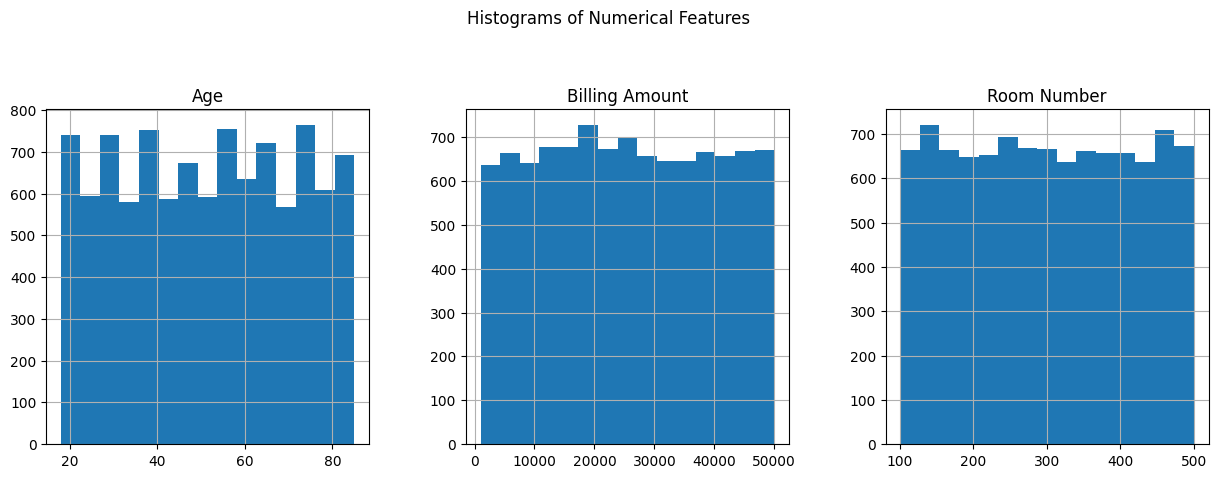

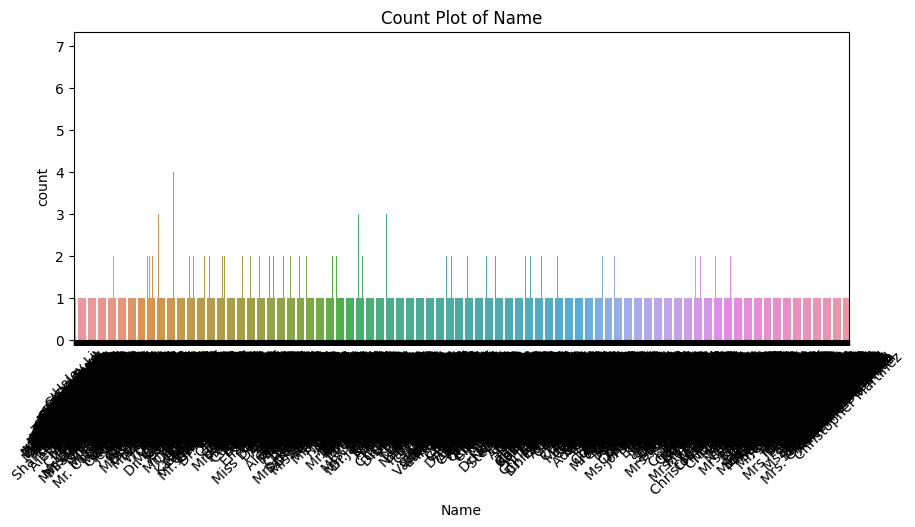

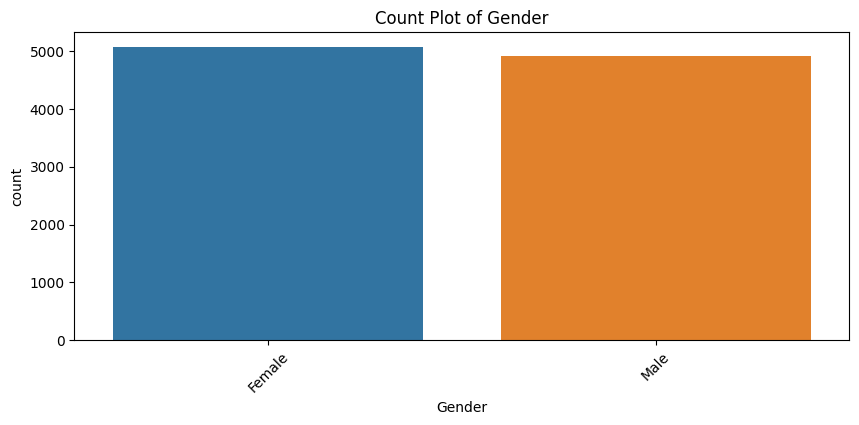

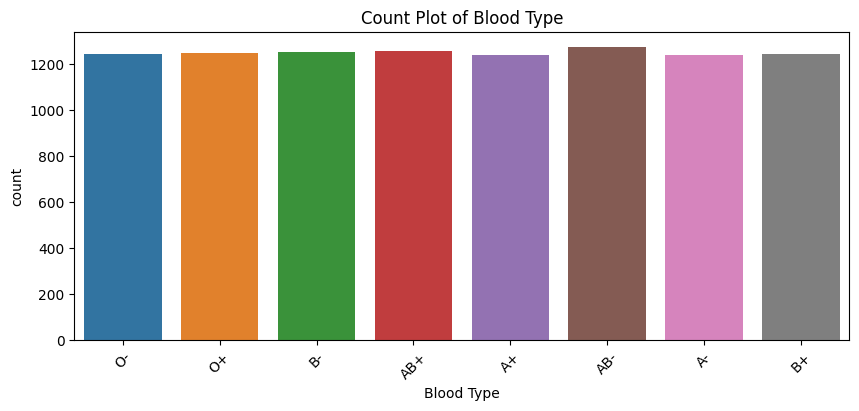

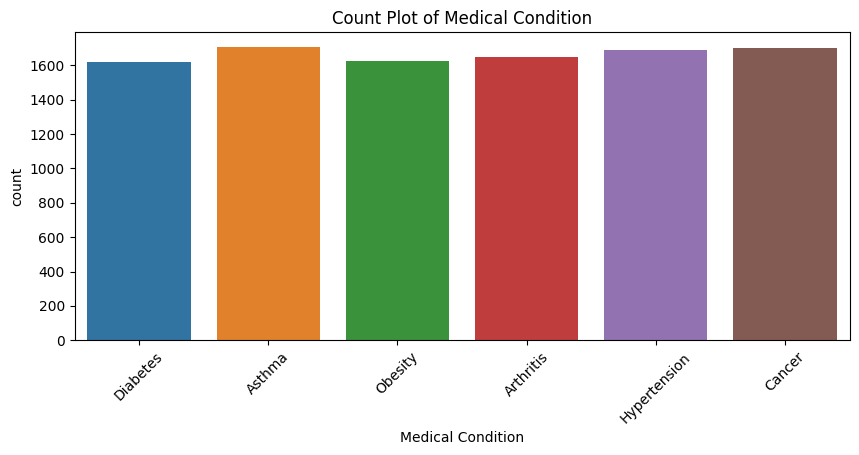

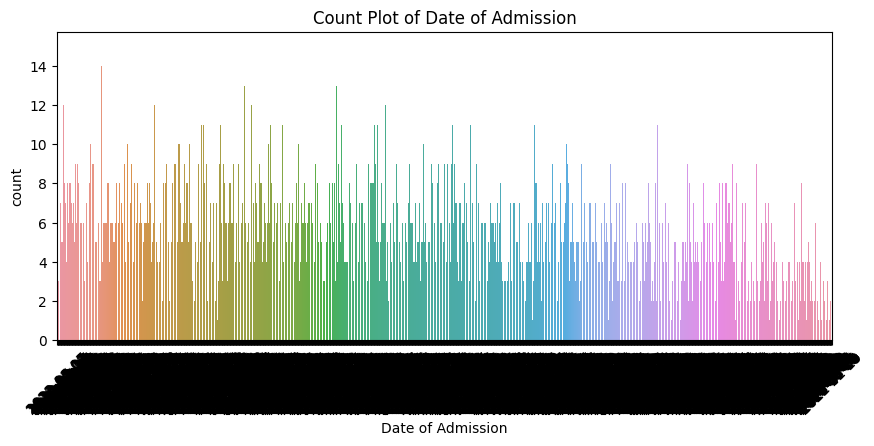

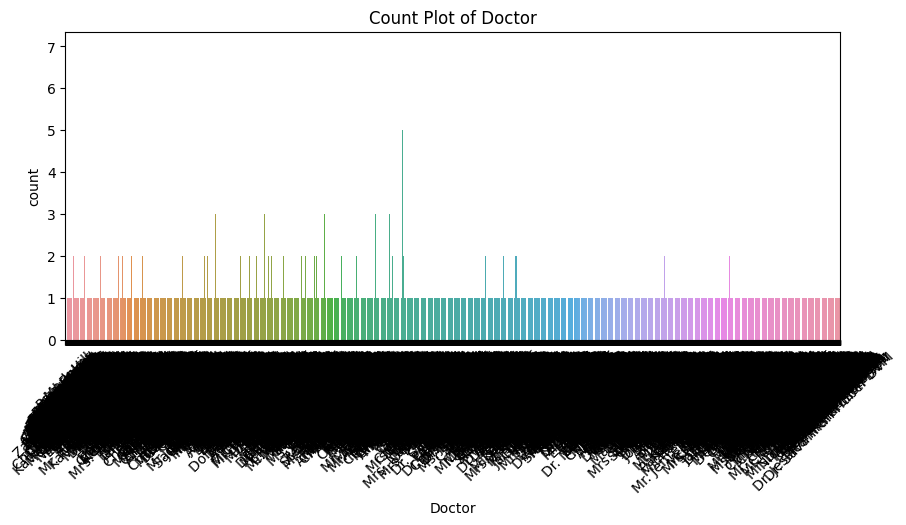

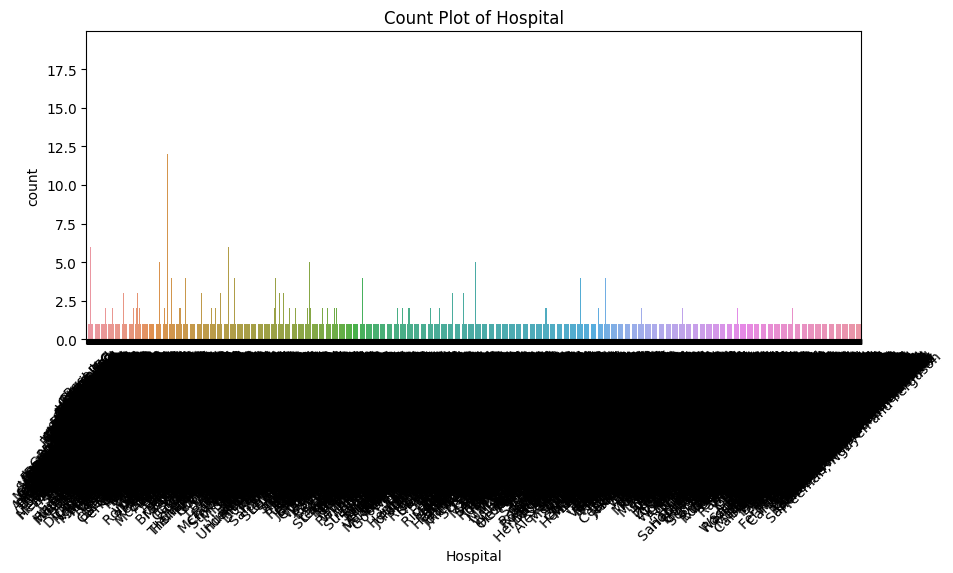

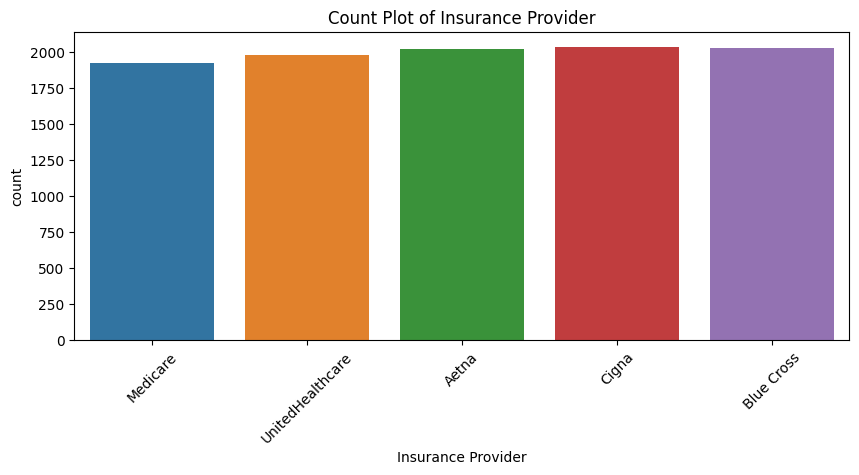

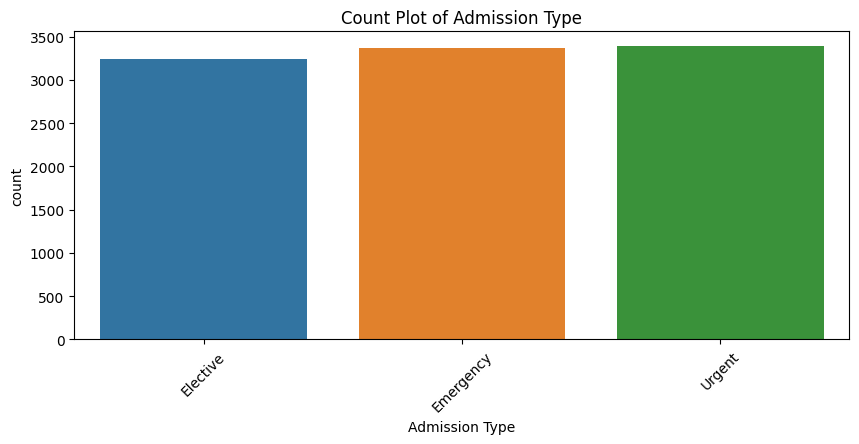

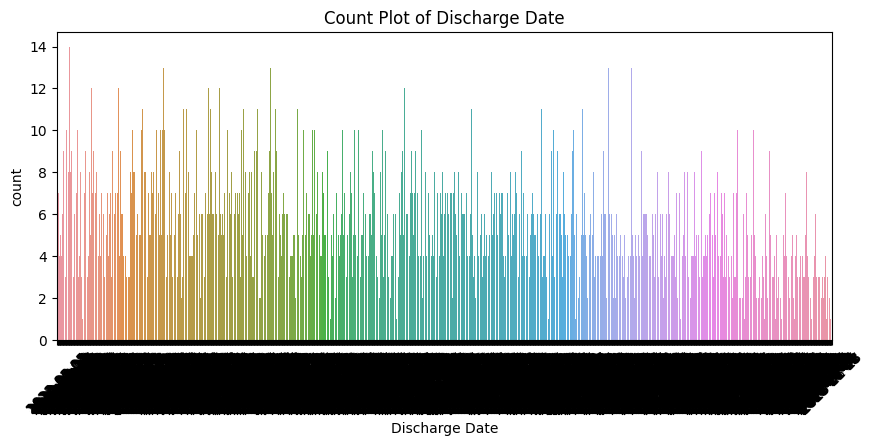

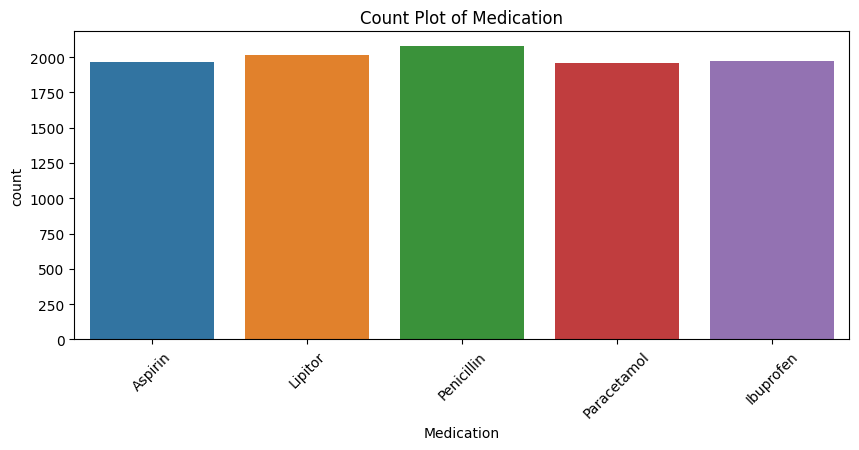

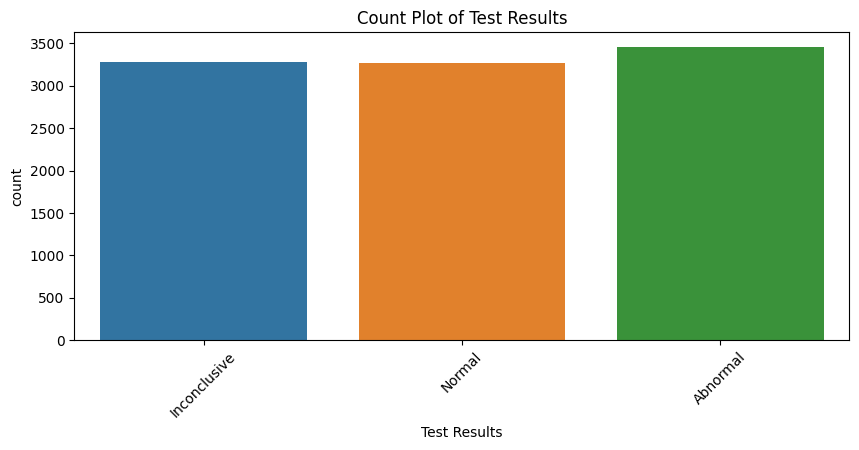

In [11]:
# Histograms for numerical features
df.hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


**Bivariate Analysis**

*Bivariate analysis explores the relationship between two variables.*


This above code covers a comprehensive range of steps for preparing and analyzing healthcare data for causal inference

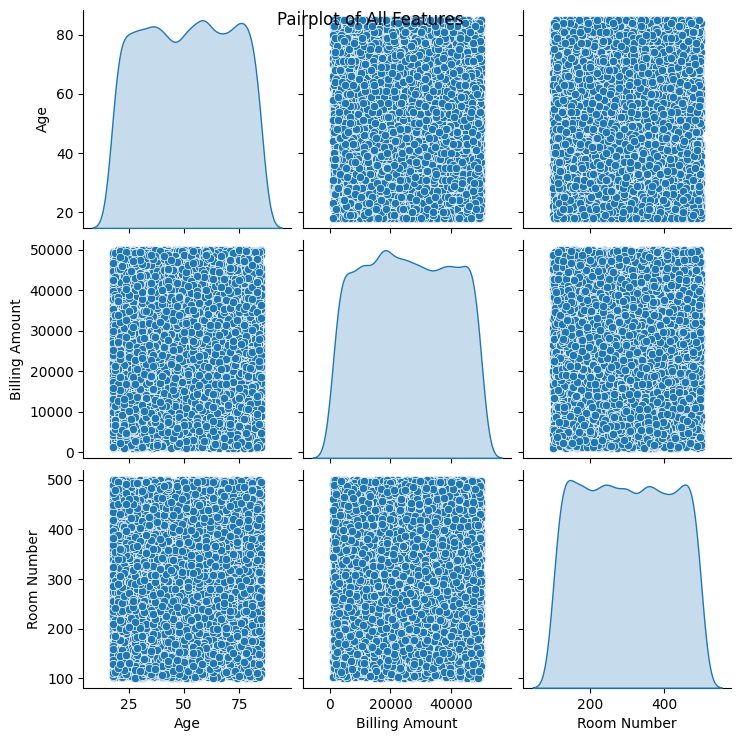

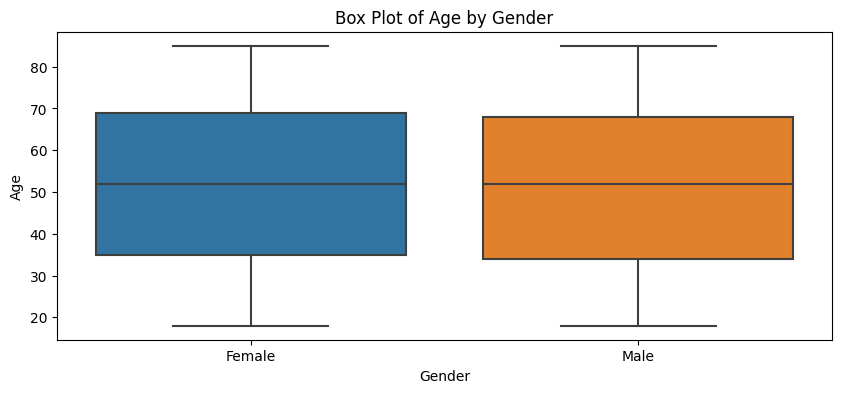

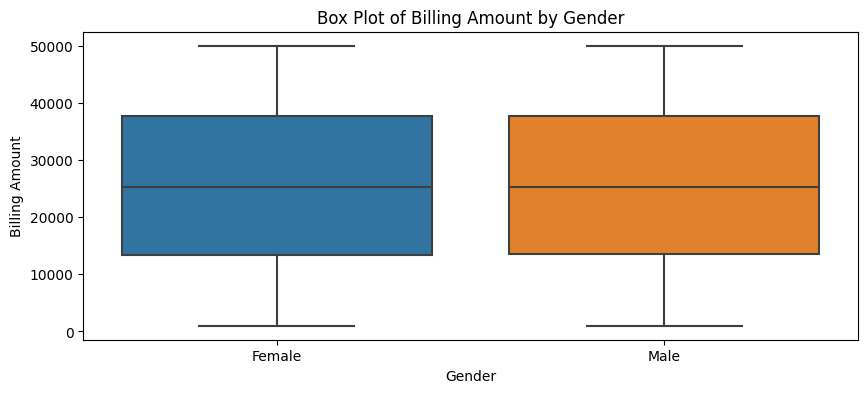

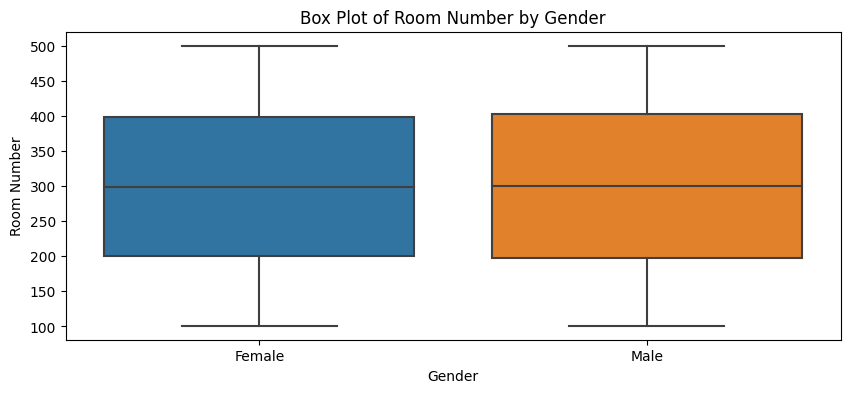

In [12]:
# Pairplot for a pairwise relationship in dataset
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of All Features')
plt.show()

# Boxplots for numerical data against a categorical feature (e.g., Gender)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Gender', y=col, data=df)
    plt.title(f'Box Plot of {col} by Gender')
    plt.show()


By taking into consideration the factors that predict receiving the therapy, Propensity Score Matching (PSM) is a statistical technique used to evaluate the influence of a policy, treatment, or other intervention. In observational studies when randomized controlled trials are impractical, it is frequently utilized.

In order to execute PSM, you typically need to:


Selecting and defining the control and treatment groups Determine the elements of your dataset's "treatment."

Calculate Propensity Scores: Based on observed attributes, calculate the propensity (likelihood) that each unit (patient, for example) would receive the treatment using logistic regression or another model.

Units in the treatment group should be matched with units in the control group that are comparable to them based on their propensity scores.


In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Tanvivalkunde/ADSA/main/healthcare_dataset.csv')

# Define treatment and outcome variables
df['treatment'] = np.where(df['Medication'] == 'Aspirin', 1, 0)

# Assuming 'Test Results' is categorical, we need to encode it
# For example, encoding 'Normal' as 1 and others as 0
df['outcome'] = np.where(df['Test Results'] == 'Normal', 1, 0)

# Selecting covariates
covariates = ['Age', 'Gender', 'Medical Condition']
encoder = OneHotEncoder()
encoded_covariates = encoder.fit_transform(df[covariates]).toarray()

# Propensity Score Estimation
model = LogisticRegression()
model.fit(encoded_covariates, df['treatment'])
df['propensity_score'] = model.predict_proba(encoded_covariates)[:, 1]

# Nearest neighbor matching within a caliper
def match_units(treated_df, control_df, caliper=0.05):
    matched = []
    for i, row in treated_df.iterrows():
        control_pool = control_df[np.abs(control_df['propensity_score'] - row['propensity_score']) < caliper]
        if not control_pool.empty:
            match = control_pool.iloc[0]
            matched.append(match)
            control_df = control_df.drop(match.name)
    return pd.DataFrame(matched)

treated = df[df['treatment'] == 1]
control = df[df['treatment'] == 0]
matched_control = match_units(treated, control)

# Comparing outcomes
treated_outcomes = treated['outcome']
control_outcomes = matched_control['outcome']
effect_estimate = treated_outcomes.mean() - control_outcomes.mean()

print("Estimated Treatment Effect:", effect_estimate)



Estimated Treatment Effect: 0.016768292682926844


In conclusion, the estimated treatment effect of roughly 0.0168 shows that there is a slight positive correlation in your dataset between the therapy (aspirin) and the outcome (probably normal test results). This conclusion, which came to as a result of PSM analysis, helps to clarify the possible effects of aspirin in the particular context and study constraints. Additional research, perhaps utilizing different analytical techniques or more data



LICENSE¶

MIT License

Copyright (c) 3022 Tanvi Manohar Valkunde

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [ ]:
References:

Kaggle Notebooks
Youtube videos